In [1]:
# Imports
import pandas as pd 
import numpy as np 
import cv2
import os
import shutil
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Checking OpenCV Version

print(cv2.__version__)

4.2.0


In [3]:
# Examining a sample Image 

test_img = cv2.imread('../Datasets/lionel_messi/_111066400_messi.jpg')
test_img.shape

(576, 1024, 3)

In [4]:
"""

The image has three dimensions :

X Coordinates
Y Coordinates 
RGB Value's


"""

"\n\nThe image has three dimensions :\n\nX Coordinates\nY Coordinates \nRGB Value's\n\n\n"

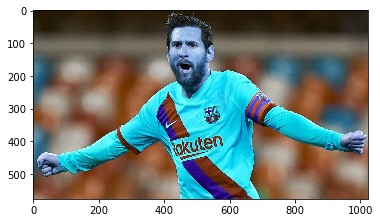

In [5]:
plt.imshow(test_img)

In [6]:
# Lets see the image without the RGB Values 

gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(576, 1024)

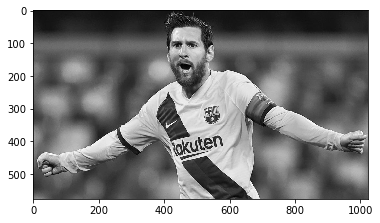

In [7]:
plt.imshow(gray_img, cmap='gray')

# Data Cleaning

In [7]:
"""

To clean the data i need to :

1. Crop Images.
2. Check if an image has a FACE and TWO EYES (Using Harcascade)
3. Check if the image is of the celebrity i want.
4. Check for noise in the images



"""

'\n\nTo clean the data i need to :\n\n1. Crop Images.\n2. Check if an image has a FACE and TWO EYES (Using Harcascade)\n3. Check if the image is of the celebrity i want.\n4. Check for noise in the images\n\n\n\n'

### Exploring Diffrent Cascade Methods 

In [8]:

# Initialising Cascade Models

face_cascader = cv2.CascadeClassifier('../OpenCV_Dependencies/haarcascades/haarcascade_frontalface_default.xml')
eye_cascader = cv2.CascadeClassifier('../OpenCV_Dependencies/haarcascades/haarcascade_eye.xml')


# Applying Face Cascade Model to Image

face_detector = face_cascader.detectMultiScale(gray_img, 1.3, 5)
face_detector

array([[394,  54, 138, 138]], dtype=int32)

In [9]:
# The 4 Values represent : X, Y , Widht and Height

In [10]:
"""
# Plotting the Detected Face 

(x_cord, y_cord, width, height) = face_detector[0]

face_detected_img = cv2.rectangle(test_img, (x_cord, y_cord), (x_cord+width, y_cord+height), (0, 255, 0), 2)
plt.imshow(face_detected_img) """

'\n# Plotting the Detected Face \n\n(x_cord, y_cord, width, height) = face_detector[0]\n\nface_detected_img = cv2.rectangle(test_img, (x_cord, y_cord), (x_cord+width, y_cord+height), (0, 255, 0), 2)\nplt.imshow(face_detected_img) '

In [12]:
"""

# Applying Eye Cascade + Face Cascade Model to Image

cv2.destroyAllWindows()

for ((x_cord, y_cord, width, height)) in face_detector :

    face_detected_img = cv2.rectangle(test_img, (x_cord, y_cord), (x_cord+width, y_cord+height), (0, 255, 0), 2)

    roi_gray = gray_img[y_cord:y_cord+height, x_cord:x_cord+width]
    roi_color = face_detected_img[y_cord:y_cord+height, x_cord:x_cord+width]

    eye_detector = eye_cascader.detectMultiScale(roi_gray)

    for ((eye_x_cord, eye_y_cord, eye_width, eye_height)) in eye_detector :


        cv2.rectangle(roi_color, (eye_x_cord, eye_y_cord), (eye_x_cord+eye_width, eye_y_cord+eye_height), (0, 255, 0), 2)





plt.figure()
plt.imshow(face_detected_img, cmap='gray')
plt.show()

"""


"\n\n# Applying Eye Cascade + Face Cascade Model to Image\n\ncv2.destroyAllWindows()\n\nfor ((x_cord, y_cord, width, height)) in face_detector :\n\n    face_detected_img = cv2.rectangle(test_img, (x_cord, y_cord), (x_cord+width, y_cord+height), (0, 255, 0), 2)\n\n    roi_gray = gray_img[y_cord:y_cord+height, x_cord:x_cord+width]\n    roi_color = face_detected_img[y_cord:y_cord+height, x_cord:x_cord+width]\n\n    eye_detector = eye_cascader.detectMultiScale(roi_gray)\n\n    for ((eye_x_cord, eye_y_cord, eye_width, eye_height)) in eye_detector :\n\n\n        cv2.rectangle(roi_color, (eye_x_cord, eye_y_cord), (eye_x_cord+eye_width, eye_y_cord+eye_height), (0, 255, 0), 2)\n\n\n\n\n\nplt.figure()\nplt.imshow(face_detected_img, cmap='gray')\nplt.show()\n\n"

In [11]:

"""
# Cropped Image with Face and Eyes Detected
plt.imshow(roi_color) """

'\n# Cropped Image with Face and Eyes Detected\nplt.imshow(roi_color) '

In [12]:
# Lets Create a Function so that we can apply later

def image_detector_cropper(path_to_image) :

        image = cv2.imread(path_to_image)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        face_detector = face_cascader.detectMultiScale(gray_image, 1.3, 5)
        
        
        for ((x_cord, y_cord, width, height)) in face_detector :

                roi_gray = gray_image[y_cord:y_cord+height, x_cord:x_cord+width]
                roi_color = image[y_cord:y_cord+height, x_cord:x_cord+width]
                eyes_detector = eye_cascader.detectMultiScale(roi_gray)

                if (len(eyes_detector) >= 2):

                    return roi_color







    


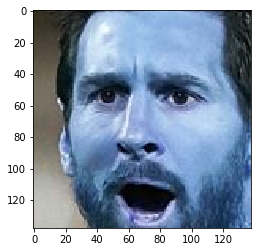

In [13]:
plt.imshow(image_detector_cropper('../Datasets/lionel_messi/_111066400_messi.jpg'))

In [15]:
# Getting Individual Directories

path_to_datasets = "../Datasets/"
path_for_cropped_datasets = "../Cropped_Datasets/"

image_directories = [] # Will Hold Names of Directories

for directory in os.scandir(path_to_datasets) :

    if directory.is_dir() :

        image_directories.append(directory.path)


In [16]:
# Saving to Cropped Datasets 

# Check if Directory Exists else Create
if os.path.exists(path_for_cropped_datasets) :

    shutil.rmtree(path_for_cropped_datasets)

os.mkdir(path_for_cropped_datasets)


# Create new individual directories

cropped_img_directories = []
sports_celeb_names = {}


for directory in image_directories :

    count = 1
    celeb_name = directory.split('/')[-1]

    for celeb_img in os.scandir(directory) :

        cropped_img = image_detector_cropper(celeb_img.path)

        if cropped_img is not None :

            # Saved to Cropped Folder

            cropped_img_folder = path_for_cropped_datasets + celeb_name

            if not os.path.exists(cropped_img_folder) :

                os.mkdir(cropped_img_folder)
                cropped_img_directories.append(cropped_img_folder)


                print("Generating Cropped Image Directory for {celebrity_name}".format(celebrity_name=celeb_name))

            # Saving Cropped Images
            croppped_filename = celeb_name + str(count) + ".png"
            cropped_filepath = cropped_img_folder + "/" + croppped_filename
            cv2.imwrite(cropped_filepath, cropped_img)
            sports_celeb_names[celeb_name].append(cropped_filepath)

            count  += 1








AttributeError: module 'os' has no attribute 'mkdirs'